# A. BUSINESS PROBLEM

Ayiti Analytics Data Processing Bootcamp
Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students

How many applications must be made to select 25% women for each on average

What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection

What is the average number of university students who should participate in this program

What will be the average number of applications per week that we could have
How many weeks should we extend the application process to select 60 students per commune?
If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection
NB
Use the same framework of the BA project to complete this project

# B. DATA CLEANING

## STEP 1 : IMPORTING THE REQUIRED LIBRARIES

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re as re
import seaborn as sns
import datetime as dt


##STEP 2 : LOADING DATA FILES

In [81]:
from google.colab import files

In [82]:
uploaded = files.upload()

Saving commune.xlsx to commune (1).xlsx
Saving data.ipynb to data (1).ipynb
Saving Dictionnaire.xlsx to Dictionnaire (1).xlsx
Saving enroll.csv to enroll (1).csv
Saving industry.csv to industry (1).csv
Saving ord.csv to ord (1).csv
Saving quest.csv to quest (1).csv
Saving study_domain.csv to study_domain (1).csv
Saving technology.csv to technology (1).csv
Saving transaction.csv to transaction (1).csv


## STEP 3 : READING FILES

In [83]:
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")
commune=pd.read_excel(r"commune.xlsx")

## STEP 4 : CONVERT INTO DUMMIES & GROUP BY COMMON COLUMN

In [84]:
# We define a function to 
def dummies_create(data, value):
  x=pd.get_dummies(data=data, columns=value, prefix="", prefix_sep="")
  y=x.groupby("quest_id").sum()
  return y

In [85]:
study_domain2 = dummies_create(study_domain[["key", "quest_id", "values"]], ["values"])
technology2 = dummies_create(technology[["key", "quest_id", "values"]], ['values'])
industry2 = dummies_create(industry[["key", "quest_id", "values"]], ['values'])

In [86]:
industry2.head(2)

,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other
quest_id,,,,,,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,1,0,0,0,0,0,0,0,0,0
905e2608-ce95-11eb-809f-7c67a234f601,0,1,1,1,0,0,0,0,1,0,0,1,0,0


## STEP 5 : MERGE DATAFRAMES BY COMMON COLUMN

In [87]:
#Transform "Commune_Id" Values in lower Character before Merge
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
#Rename "Commune_Id" in "commune"
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)
commune

,Commune_en,Commune_FR,commune,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10
...,...,...,...,...,...
135,Tiburon,Tiburon,HT0753,South,HT07
136,Torbeck,Torbeck,HT0712,South,HT07
137,Trou du Nord,Trou du Nord,HT0431,North-East,HT04
138,Vallieres,Vallières,HT0441,North-East,HT04


In [88]:
result1=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','commune'])
result1

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,Centre,HT06
246,246,male,8/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,Centre,HT06
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,Centre,HT06
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],No,unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,North-East,HT04


In [89]:
result2=pd.merge(left=result1, right=study_domain2, how = 'left',on='quest_id')
result2.head(2)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Departement,ADM1_PCODE,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
result3=pd.merge(enroll,transaction, how = 'right',left_on =['user_id'],right_on = ['user_id'])

In [91]:
result3.head(2)

,Unnamed: 0_x,created_at_x,expiry_date,user_id,course_name,course_id_x,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id,Unnamed: 0_y,created_at_y,modified_at,course_id_y,transaction_id
0,129,2021-03-08T05:08:50.684Z,2071-02-24T05:09:12.000Z,40976440,Entwodiksyon Nan Syans Done,1047613,0.697674,NaN,False,False,False,2021-03-09T00:27:53.844Z,2021-03-08T05:08:50.000Z,2021-03-14T20:59:58.974Z,90659b00-ce95-11eb-9e8f-7c67a234f601,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,1047613,4641281952
1,130,2021-03-08T17:26:35.715Z,2071-02-24T17:26:38.000Z,41179271,Entwodiksyon Nan Syans Done,1047613,0.348837,NaN,False,False,False,2021-03-08T17:28:47.207Z,2021-03-08T17:26:35.000Z,2021-03-09T18:27:55.012Z,9064c428-ce95-11eb-a021-7c67a234f601,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,1047613,4644270160


In [92]:
result4 =pd.merge(enroll,ord, how = 'right',left_on =['user_id'],right_on = ['user_id'] )
result4.head(2)

,Unnamed: 0_x,created_at_x,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id_x,Unnamed: 0_y,created_at_y,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id_y
0,146.0,2021-03-14T15:34:39.800Z,NaN,41587952,Entwodiksyon Nan Syans Done,1047613.0,0.325581,NaN,False,False,False,2021-03-14T15:34:56.007Z,2021-03-14T15:34:39.768Z,2021-03-14T17:30:53.379Z,906b3c86-ce95-11eb-b6a7-7c67a234f601,0,2021-03-14T15:34:35.014Z,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,144.0,2021-03-14T04:20:30.803Z,NaN,41564742,Entwodiksyon Nan Syans Done,1047613.0,0.023256,NaN,False,False,False,2021-03-14T04:22:12.626Z,2021-03-14T04:20:30.786Z,2021-03-14T04:48:39.798Z,906636cf-ce95-11eb-8679-7c67a234f601,1,2021-03-14T04:20:23.483Z,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601


In [93]:
result3['Payment Method'] = 'Yes'
result4['Payment Method'] = 'Yes'
x = result4.loc[:,['Payment Method','quest_id_y']]
y = result3.loc[:,['Payment Method','quest_id']]
x=x.rename(columns = {'quest_id_y': 'quest_id'})
z = pd.concat([x,y],axis = 0)
display(z)


,Payment Method,quest_id
0,Yes,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,Yes,906636cf-ce95-11eb-8679-7c67a234f601
2,Yes,906968f5-ce95-11eb-9e1a-7c67a234f601
3,Yes,9060477c-ce95-11eb-ace3-7c67a234f601
4,Yes,9064ff29-ce95-11eb-a3d3-7c67a234f601
...,...,...
55,Yes,NaN
56,Yes,90691afb-ce95-11eb-a4c3-7c67a234f601
57,Yes,906b65e3-ce95-11eb-a294-7c67a234f601
58,Yes,906241d5-ce95-11eb-9850-7c67a234f601


In [94]:
result5 = pd.merge(result1,z,how = 'left', left_on = 'quest_id', right_on= 'quest_id')
result5

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Departement,ADM1_PCODE,Payment Method
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01,NaN
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01,NaN
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,West,HT01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,Centre,HT06,Yes
246,246,male,8/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,Centre,HT06,NaN
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,Centre,HT06,Yes
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],No,unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,North-East,HT04,Yes


In [95]:
result5.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'Commune_en',
       'Commune_FR', 'Departement', 'ADM1_PCODE', 'Payment Method'],
      dtype='object')

In [96]:
result5 = result5.loc[:, ['gender','dob','created_at','education_level','university','current_employed','formal_sector_job','have_computer_home','internet_at_home','hear_AA_1','after_AA','quest_id', 'Commune_FR','Departement','Payment Method']]
result5.head(2)

,gender,dob,created_at,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_FR,Departement,Payment Method
0,male,25/08/1998,2021-02-14T23:03:52.768400Z,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN
1,female,29/09/1996,2021-02-16T16:01:10.861844Z,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,NaN


In [97]:
my_dict = {'gender':'Sex','created_at':'date','hear_AA_1':'Channel','after_AA':'what will you do after'}
result5.rename(columns=my_dict, inplace=True)
display(result5.head(4))

,Sex,dob,date,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,Channel,what will you do after,quest_id,Commune_FR,Departement,Payment Method
0,male,25/08/1998,2021-02-14T23:03:52.768400Z,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN
1,female,29/09/1996,2021-02-16T16:01:10.861844Z,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,NaN
2,male,17/05/1996,2021-02-16T16:56:30.579504Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,Yes
3,male,24/11/1996,2021-02-16T16:57:55.754541Z,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,NaN


In [98]:
result5["date"]= pd.to_datetime(result5["date"])
result5["date"] = result5["date"].apply(lambda x: str(x)[:10])
result5["date"].head(6)

0    2021-02-14
1    2021-02-16
2    2021-02-16
3    2021-02-16
4    2021-02-16
5    2021-02-16
Name: date, dtype: object

In [99]:
print(result5.loc[result5["dob"]=="3 aout 1977",:])

       Sex          dob        date  ...      Commune_FR Departement Payment Method
13  female  3 aout 1977  2021-02-17  ...  Port-au-Prince        West            NaN

[1 rows x 15 columns]


In [100]:
result5["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
result5["dob"]= pd.to_datetime(result5["dob"])
result5["dob"]

0     1998-08-25
1     1996-09-29
2     1996-05-17
3     1996-11-24
4     1997-07-20
         ...    
245   1994-02-15
246   1990-08-10
247   1993-12-28
248   1992-04-17
249   1993-07-22
Name: dob, Length: 250, dtype: datetime64[ns]

In [101]:
result5['Payment Method'] = result5['Payment Method'].fillna('No')
result5['Payment Method']

0       No
1       No
2      Yes
3       No
4       No
      ... 
245    Yes
246     No
247    Yes
248    Yes
249    Yes
Name: Payment Method, Length: 250, dtype: object

In [102]:
result5.dropna()
result5.shape

(250, 15)

In [103]:
result5.columns.T

Index(['Sex', 'dob', 'date', 'education_level', 'university',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'Channel', 'what will you do after', 'quest_id',
       'Commune_FR', 'Departement', 'Payment Method'],
      dtype='object')

In [104]:
result5.head(2)

,Sex,dob,date,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,Channel,what will you do after,quest_id,Commune_FR,Departement,Payment Method
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,No
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,No


In [105]:
result5.dtypes

Sex                               object
dob                       datetime64[ns]
date                              object
education_level                   object
university                        object
current_employed                  object
formal_sector_job                 object
have_computer_home                object
internet_at_home                  object
Channel                           object
what will you do after            object
quest_id                          object
Commune_FR                        object
Departement                       object
Payment Method                    object
dtype: object

In [106]:
from datetime import date
def Calculate_Age(born) :
    """
    This function will allow us to calcute the age of all the applicants by the end of the application process
    """
    today = date(2021,6,18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

In [107]:
result5['Age'] = result5['dob'].apply(Calculate_Age)
result5['Age']

0      22.0
1      24.0
2      25.0
3      24.0
4      23.0
       ... 
245    27.0
246    30.0
247    27.0
248    29.0
249    27.0
Name: Age, Length: 250, dtype: float64

In [108]:
numb_na = result5.isna().sum()
numb_na.sort_values()
numb_na[numb_na>0].count

<bound method Series.count of dob            6
Commune_FR     2
Departement    2
Age            6
dtype: int64>

### Dataframes

In [109]:
result5 = result5.drop(["dob"], axis=1)
result5

,Sex,date,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,Channel,what will you do after,quest_id,Commune_FR,Departement,Payment Method,Age
0,male,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,No,22.0
1,female,2021-02-16,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,No,24.0
2,male,2021-02-16,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,Yes,25.0
3,male,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,No,24.0
4,male,2021-02-16,High School (16 years),unknown,No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,No,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,2021-03-02,Bachelors (bacc +4),other,Yes,Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Centre,Yes,27.0
246,male,2021-03-10,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Centre,No,30.0
247,male,2021-03-14,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,Yes,Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Centre,Yes,27.0
248,male,2021-03-08,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,North-East,Yes,29.0


In [110]:
result5.columns

Index(['Sex', 'date', 'education_level', 'university', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'internet_at_home',
       'Channel', 'what will you do after', 'quest_id', 'Commune_FR',
       'Departement', 'Payment Method', 'Age'],
      dtype='object')

### Context : The Ayiti Analytics objective is to know which three communes of the country will be the most likely to expand its training centers. Knowing that each cohort must have 30 students.
### NB : Use the same framework of the BA project to complete this project

# C. DESCRIPTIVE ANALYSIS

### Graph and Pivot Function Generator

In [112]:
# Define a function who generate barchart
def generate_barchart(data=result5, title ="",abs_value ="Total",rel_value="Percent",figsize =(20,10)):
  
  """ function who generate barchart"""
  
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
              fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [113]:
# Calculate absolute frequency and relative Frequency for a categpric variable

def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  res1 = data[col].value_counts().to_frame()
  res1.columns = [abs_value]

  res2 = data[col].value_counts(normalize=True).to_frame()
  res2.columns = [rel_value]
  if  not show_plot:
    return pd.concat([res1,res2],axis=1)
  else:
    result = pd.concat([res1,res2],axis=1)
    generate_barchart(data=result.head(), title =title,abs_value =abs_value,rel_value=rel_value,figsize =(12,10))
    return result

### About Ayiti Analytics Goal

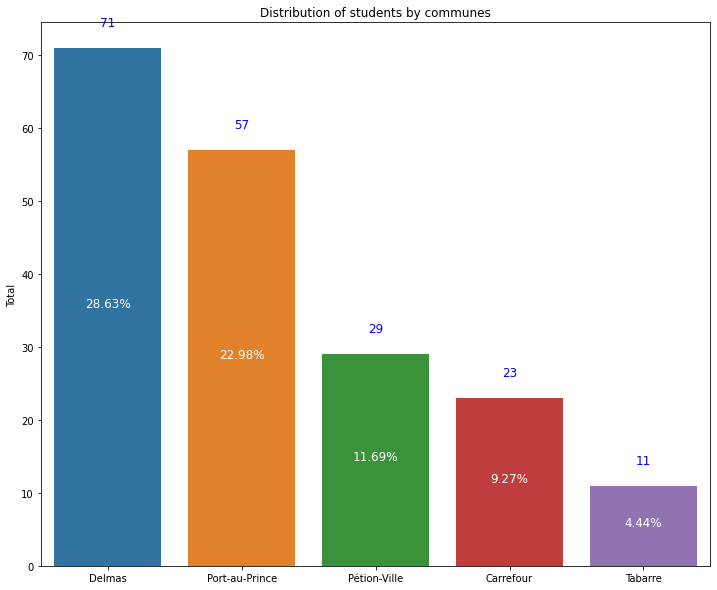

,Total,Percent
Delmas,71,0.286290
Port-au-Prince,57,0.229839
Pétion-Ville,29,0.116935
Carrefour,23,0.092742
Tabarre,11,0.044355
Croix-Des-Bouquets,10,0.040323


In [160]:
# The best three communes
# Distribution of students by communes
persent_commune = prob_category(data=result5, col = "Commune_FR", show_plot =True,title = "Distribution of students by communes")
persent_commune.head(6)

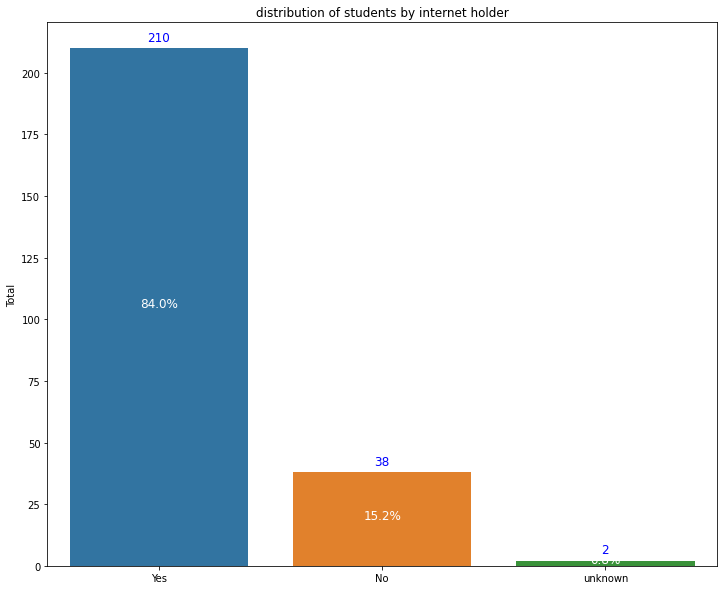

,Total,Percent
Yes,210,0.840
No,38,0.152
unknown,2,0.008


In [159]:
# distribution of students by internet holder
internet = prob_category(data=result5, col = "internet_at_home", show_plot =True,title = "distribution of students by internet holder")
internet

### About question 1

#### Question 1. How many applications must be made to select 25% women for each on average

Ayiti Analytics has the objectif to select third (30) student by communes of the country.
this year they select twenty (20) student
AA need a 30-students cohort, that means they intent
to multiply by 1.5 the numbers of female applicants.
The 3-Rule python programm below just give the answer

### A 3-Rule python program

In [231]:
# Let's define a python program cross product to find the result of every question 
def boot(a, b, c):
   return (b*c)//a

### Answer 1

In [265]:
 boot(20, 250, 25)

312

### About question 2

#### Question 2. What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection

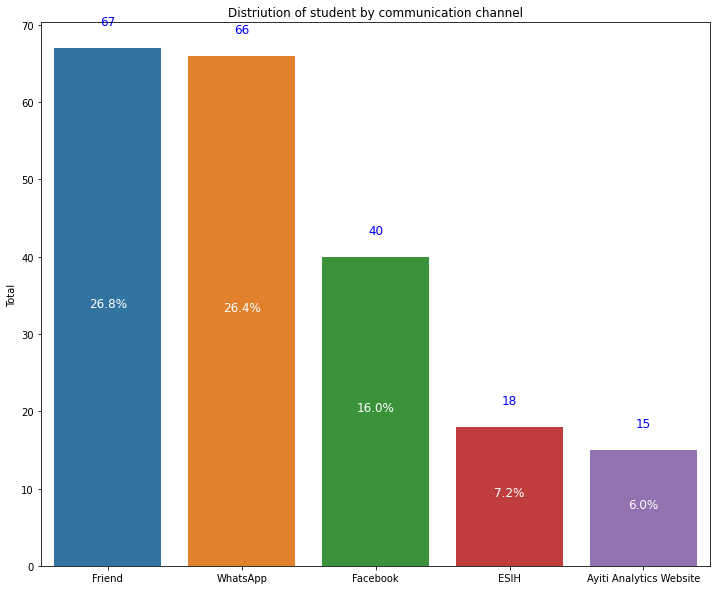

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
Ayiti Analytics Website,15,0.060
LinkedIn,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [161]:
# Question 2
# Distriution of student by communication channel
by_channel = prob_category(data=result5, col = "Channel", show_plot =True,title = "Distriution of student by communication channel")
by_channel

In [117]:
result5.columns

Index(['Sex', 'date', 'education_level', 'university', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'internet_at_home',
       'Channel', 'what will you do after', 'quest_id', 'Commune_FR',
       'Departement', 'Payment Method', 'Age'],
      dtype='object')

### About Computer

In [118]:
# Distribution number of students by computer holder 
by_computer = result5.have_computer_home.value_counts(normalize=True).to_frame()
by_computer

,have_computer_home
Yes,0.936
No,0.060
unknown,0.004


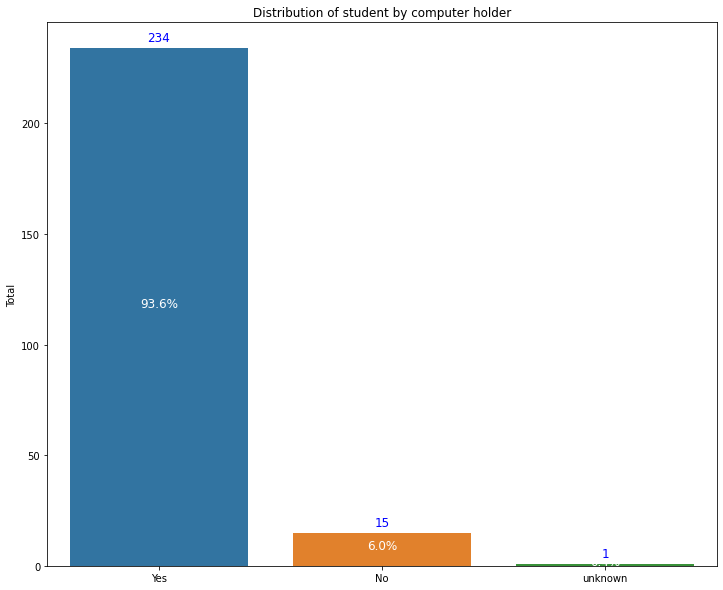

,Total,Percent
Yes,234,0.936
No,15,0.060
unknown,1,0.004


In [267]:
computer_by_student = prob_category(data=result5, col = "have_computer_home", show_plot =True,title = "Distribution of student by computer holder")
computer_by_student

### About Internet

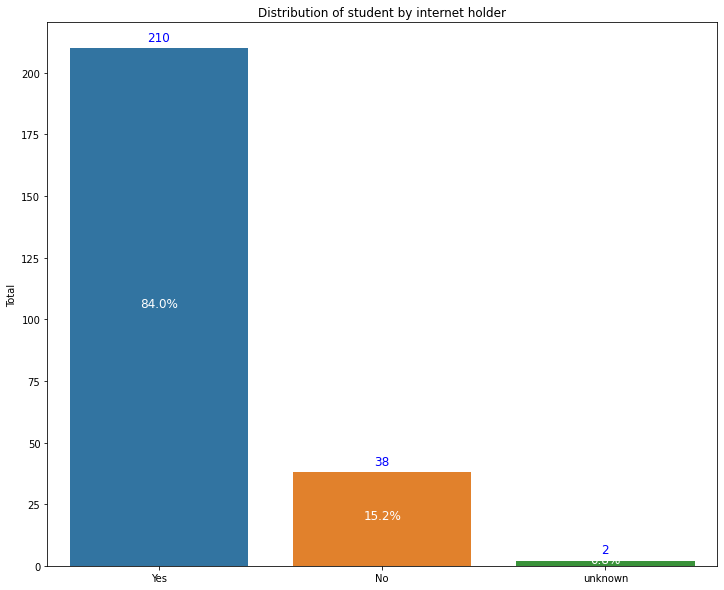

,Total,Percent
Yes,210,0.840
No,38,0.152
unknown,2,0.008


In [273]:
internet__by_student = prob_category(data=result5, col = "internet_at_home", show_plot =True,title = "Distribution of student by internet holder")
internet__by_student

### About question 3

#### Question 3. What is the average number of university students who should participate in this program

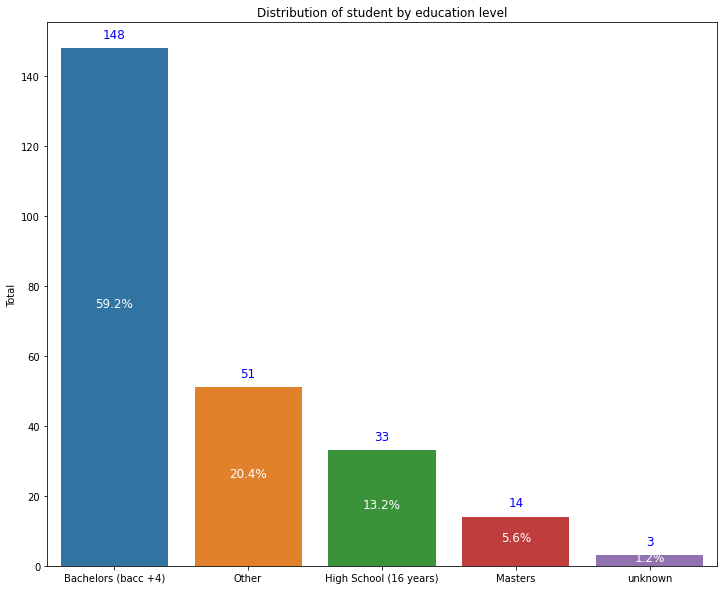

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [274]:
# Question 3
# Distribution of student by education level
by_education = prob_category(data=result5, col = "education_level", show_plot =True,title = "Distribution of student by education level")
by_education

In [121]:
level = result5.education_level.value_counts(normalize=False).to_frame()
level

,education_level
Bachelors (bacc +4),148
Other,51
High School (16 years),33
Masters,14
unknown,3
"Doctorate (PhD, MD, JD)",1


In [261]:
res = result5[(result5["education_level"]=="Bachelors (bacc +4)")|(result5["education_level"]=="High School (16 years)")|(result5["education_level"]=="Masters")|(result5["education_level"]=="Doctorate (PhD, MD, JD)")]
res.head()

,date,Sex,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,Channel,what will you do after,quest_id,Commune_FR,Departement,Payment Method,Age,male,female,week
1,2021-02-16,female,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,No,24.0,0,1,7
2,2021-02-16,male,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,West,Yes,25.0,1,0,7
3,2021-02-16,male,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,West,No,24.0,1,0,7
4,2021-02-16,male,High School (16 years),unknown,No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,West,No,23.0,1,0,7
6,2021-02-16,female,Masters,Ecole Supérieure d'Infotronique d'Haïti (ESIH),Yes,Yes,Yes,Yes,WhatsApp,Improving my data analysis skills,905ec1ec-ce95-11eb-8136-7c67a234f601,Port-au-Prince,West,Yes,33.0,0,1,7


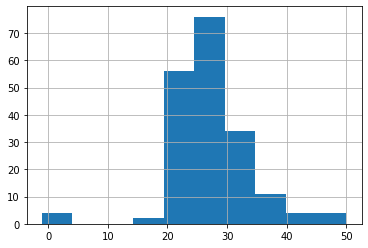

In [276]:
res["Age"].hist()

### Answer 3

In [123]:
# Answer to Question 3
student_mean = res.education_level.value_counts(normalize=False).to_frame()
student = student_mean.mean()
print(student)

education_level    49.0
dtype: float64


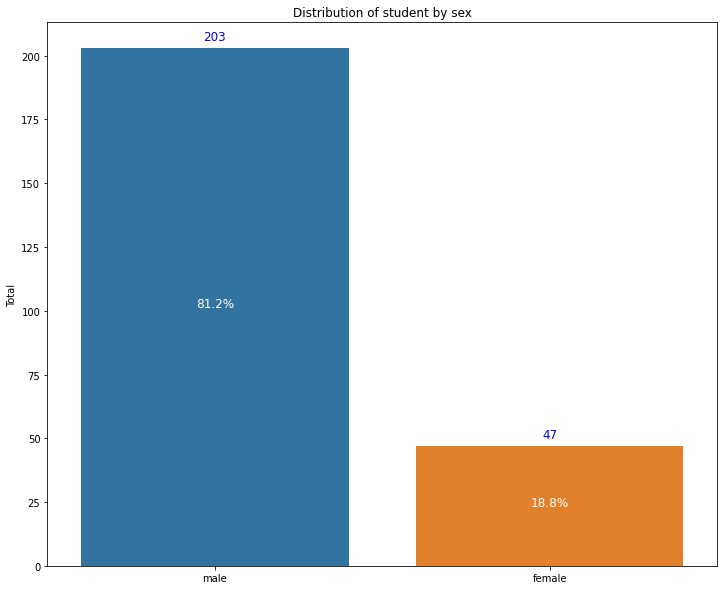

,Total,Percent
male,203,0.812
female,47,0.188


In [125]:
# Distribution of student by sex
by_sex = prob_category(data=result5, col = "Sex", show_plot =True,title = "Distribution of student by sex")
by_sex

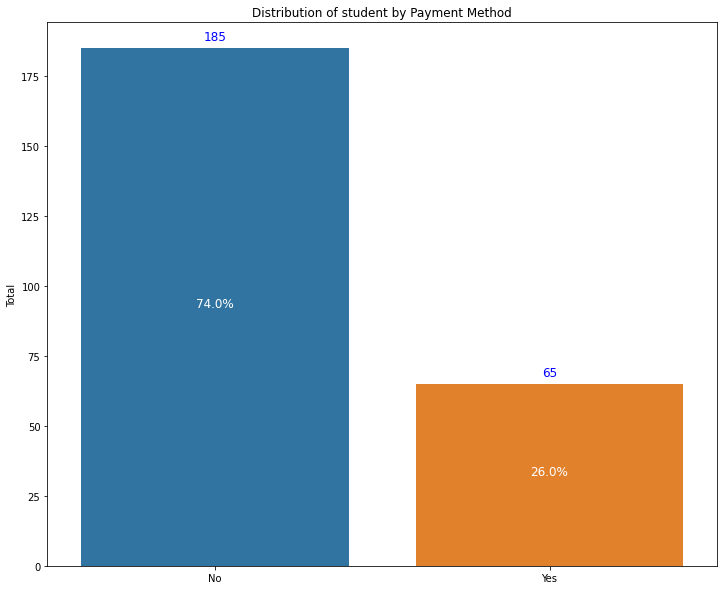

,Total,Percent
No,185,0.74
Yes,65,0.26


In [269]:
by_payment = prob_category(data=result5, col = "Payment Method", show_plot =True,title = "Distribution of student by Payment Method")
by_payment

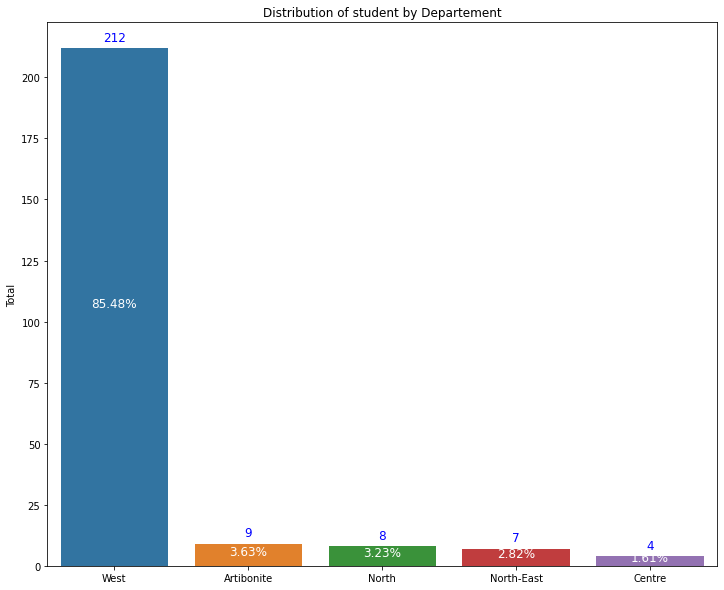

,Total,Percent
West,212,0.854839
Artibonite,9,0.036290
North,8,0.032258
North-East,7,0.028226
Centre,4,0.016129
South-East,3,0.012097
South,3,0.012097
North-West,1,0.004032
Nippes,1,0.004032


In [268]:
by_departement = prob_category(data=result5, col = "Departement", show_plot =True,title = "Distribution of student by Departement")
by_departement

### Pivot Function 

In [126]:
def pivo(x):

  """ This function allow us to do a Pivot Table"""
  
  new_pivot=pd.pivot_table(result5, values='quest_id', 
                    index=['Commune_FR'], 
                    columns=x,
                    aggfunc='count')
  new_pivot=new_pivot.fillna(0)
  #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return new_pivot

In [127]:
print(result5.columns)

Index(['Sex', 'date', 'education_level', 'university', 'current_employed',
       'formal_sector_job', 'have_computer_home', 'internet_at_home',
       'Channel', 'what will you do after', 'quest_id', 'Commune_FR',
       'Departement', 'Payment Method', 'Age'],
      dtype='object')


### About question 4

#### Question 4. What will be the average number of applications per week that we could have

In [139]:
result5.set_index("date", inplace=True)
result5.head(2)

,Sex,education_level,university,current_employed,formal_sector_job,have_computer_home,internet_at_home,Channel,what will you do after,quest_id,Commune_FR,Departement,Payment Method,Age
date,,,,,,,,,,,,,,
2021-02-14,male,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,No,22.0
2021-02-16,female,Bachelors (bacc +4),other,No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,West,No,24.0


In [167]:
result5["date"] = pd.to_datetime(result5["date"])
result5["date"]

0     2021-02-14
1     2021-02-16
2     2021-02-16
3     2021-02-16
4     2021-02-16
         ...    
245   2021-03-02
246   2021-03-10
247   2021-03-14
248   2021-03-08
249   2021-03-10
Name: date, Length: 250, dtype: datetime64[ns]

In [171]:
result5["week"] = result5["date"].dt.week
result5["week"].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


array([ 6,  7,  8,  9, 10])

In [177]:
week_1 =result5.groupby(by = ["week"]).quest_id.count().to_frame()
week_1

,quest_id
week,
6,1
7,149
8,42
9,30
10,28


In [190]:
week_res1 =result5.groupby(by = ["week"]).date.min()
week_res1

week
6    2021-02-14
7    2021-02-16
8    2021-02-22
9    2021-03-01
10   2021-03-08
Name: date, dtype: datetime64[ns]

In [191]:
week_res2 =result5.groupby(by = ["week"]).date.min().to_frame()
week_res2.columns = ["min_date"]

In [192]:
week_res3 =result5.groupby(by = ["week"]).date.max().to_frame()
week_res3.columns = ["max_date"]

In [193]:
week_res4 =pd.pivot_table(result5,values="quest_id",index ="week",columns=["Sex"],aggfunc="count",fill_value=0,)
week_res4

Sex,female,male
week,,
6,0,1
7,29,120
8,12,30
9,3,27
10,3,25


In [195]:
week_result = pd.concat([week_res2,week_res3,week_res4,week_1],axis=1)
week_result

,min_date,max_date,female,male,quest_id
week,,,,,
6,2021-02-14,2021-02-14,0,1,1
7,2021-02-16,2021-02-21,29,120,149
8,2021-02-22,2021-02-28,12,30,42
9,2021-03-01,2021-03-07,3,27,30
10,2021-03-08,2021-03-14,3,25,28


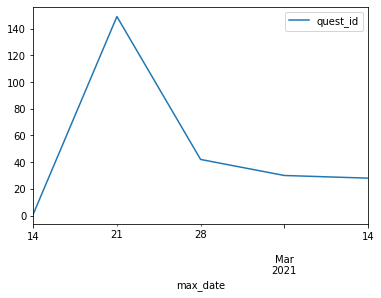

In [226]:
# weekly trend by numbers of applications
week_result.plot(x="max_date", y="quest_id", kind="line")

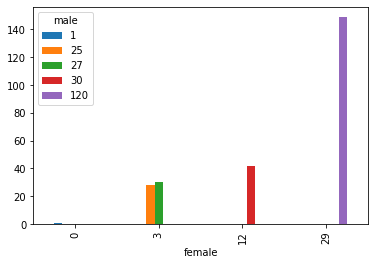

In [279]:
# Let's create a stacked bar chat to show
# Weekly distribution by sex  
week_result.groupby(['female','male']).sum().unstack().plot(kind='bar', y= "quest_id")

### Answer 4

In [230]:
week_result.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


female       9.4
male        40.6
quest_id    50.0
dtype: float64

In [278]:
print("The average of application per week :", 50)

The average of application per week : 50


### About question 5

#### Question 5. How many weeks should we extend the application process to select 60 students per commune?

Text(0, 0.5, 'number of applications')

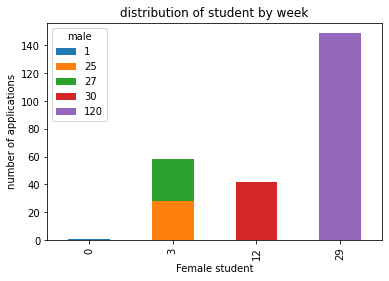

In [222]:
week_result.groupby(['female', 'male']).sum().groupby(level=[1]).cumsum().unstack().plot(kind='bar',y='quest_id', stacked = True)
plt.title("distribution of student by week")
plt.xlabel("Female student")
plt.ylabel("number of applications")

### Answer 5 

As we can see here, the number of application decreases as long as the number of applications increases.
It increases during the first week and decreases during the last four(4) weeks. 
On average, AA can realise 50 by student.
As AA needs 313 applications to reach 30 student per commune,
then for 60 student per commune, we apply 3-Rule program

For 60 Student :

In [283]:
print("If for 20 student, we have 250 applications, for 60 student we have :", boot(30,60,313))

If for 20 student, we have 250 applications, for 60 student we have : 626


During five(5) weeks, AA receive 250 student
let's calculate the how many weeks to implement the application process to reach 60 student per commune 

In [287]:
print("If for we have 250 applications, we realise a 5-weeks application, for 626, we have :", boot(250,5,626))
print("AA should extend the application process for at least", 12, "weeks")

If for we have 250 applications, we realise a 5-weeks application, for 626, we have : 12
AA should extend the application process for at least 12 weeks


### About question 6

#### Question 6. If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

### About question 6 : The best three Communes

In [128]:
pv_sex = pivo("Sex")
pv_edu = pivo("education_level")
pv_channel = pivo('Channel')
pv_internet = pivo("internet_at_home")
pv_computer = pivo("have_computer_home")
pv_employ = pivo('current_employed')
pv_payment = pivo("Payment Method")
pv_internet.rename(columns={"No":"No_internet", "Yes":"Yes_internet"}, inplace=True)
pv_computer.rename(columns={"No":"No_computer", "Yes":"Yes_computer"}, inplace=True)
pv_payment.rename(columns={"No":"Paid", "Yes":"Unpaid"}, inplace=True)

In [257]:
data_commune = pd.concat([pv_sex, pv_edu, pv_channel, pv_internet, pv_computer, pv_payment], axis=1)
data_commune.head()

,female,male,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,No_internet,Yes_internet,unknown,No_computer,Yes_computer,Paid,Unpaid
Commune_FR,,,,,,,,,,,,,,,,,,,,,,,,
Aquin,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Cap-Haïtien,0.0,5.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,5.0,5.0,0.0
Caracol,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
Carrefour,6.0,17.0,17.0,0.0,3.0,1.0,2.0,0.0,2.0,4.0,0.0,5.0,7.0,0.0,0.0,4.0,1.0,5.0,18.0,0.0,2.0,21.0,19.0,4.0
Cité Soleil,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0


In [130]:
data_by_commune = pd.concat([data_commune, persent_commune], axis=1)
data_by_commune = data_by_commune.sort_values(by=("Total"), ascending = False)
data_by_commune = data_by_commune.head(5)
data_by_commune

,female,male,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,No_internet,Yes_internet,unknown,No_computer,Yes_computer,Paid,Unpaid,Total,Percent
Delmas,12.0,59.0,41.0,1.0,8.0,5.0,16.0,0.0,5.0,6.0,7.0,4.0,25.0,3.0,6.0,14.0,1.0,10.0,61.0,0.0,5.0,66.0,49.0,22.0,71,0.286290
Port-au-Prince,19.0,38.0,28.0,0.0,9.0,4.0,14.0,2.0,2.0,4.0,6.0,9.0,11.0,0.0,5.0,17.0,3.0,6.0,51.0,0.0,1.0,56.0,39.0,18.0,57,0.229839
Pétion-Ville,4.0,25.0,20.0,0.0,3.0,1.0,5.0,0.0,3.0,0.0,2.0,5.0,8.0,1.0,0.0,9.0,1.0,3.0,25.0,1.0,4.0,25.0,24.0,5.0,29,0.116935
Carrefour,6.0,17.0,17.0,0.0,3.0,1.0,2.0,0.0,2.0,4.0,0.0,5.0,7.0,0.0,0.0,4.0,1.0,5.0,18.0,0.0,2.0,21.0,19.0,4.0,23,0.092742
Tabarre,3.0,8.0,7.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,1.0,2.0,9.0,0.0,0.0,11.0,7.0,4.0,11,0.044355


In [ ]:
#data_by_commune.groupby(by=["female", "male"]).sum()

In [131]:
a = data_by_commune['Yes_internet']
a

Delmas            61.0
Port-au-Prince    51.0
Pétion-Ville      25.0
Carrefour         18.0
Tabarre            9.0
Name: Yes_internet, dtype: float64

In [132]:
b = data_by_commune['Yes_computer']
b

Delmas            66.0
Port-au-Prince    56.0
Pétion-Ville      25.0
Carrefour         21.0
Tabarre           11.0
Name: Yes_computer, dtype: float64

In [134]:
c = data_by_commune['Yes_computer'] + data_by_commune['Yes_internet']
c

Delmas            127.0
Port-au-Prince    107.0
Pétion-Ville       50.0
Carrefour          39.0
Tabarre            20.0
dtype: float64

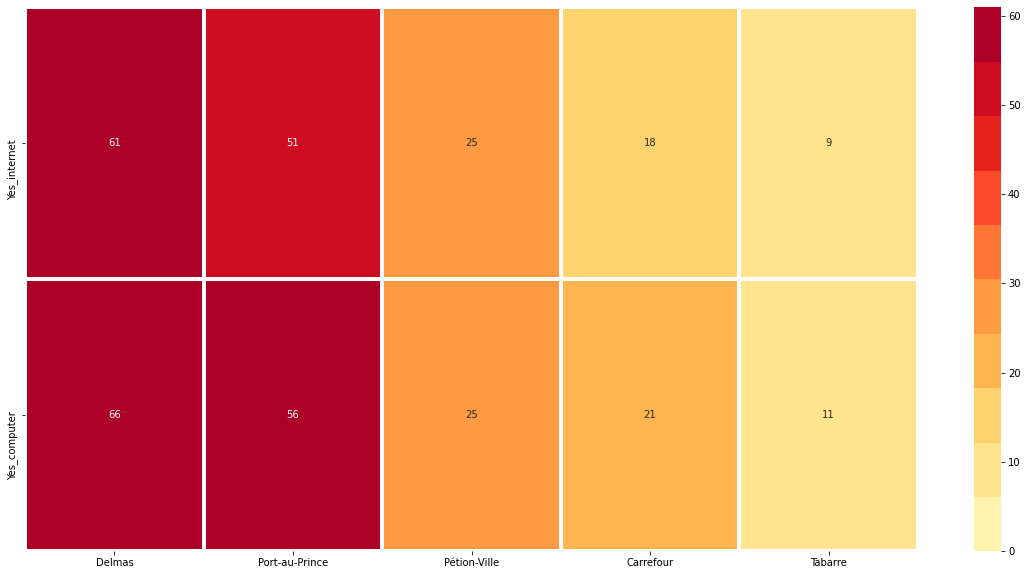

In [292]:
# Heatmap of student who have computer and internet
from matplotlib.colors import ListedColormap
c =pivo("internet_at_home")
plt.figure(figsize=(20,10))
#We have done a heat map so that we could see the commune in which the number of applicants who have internet at home is high
sns.heatmap(data=data_by_commune[["Yes_internet", "Yes_computer"]].T,cmap =ListedColormap(sns.color_palette("YlOrRd", 10)),vmin =c.min().min(),vmax =c.max().max(),annot=True,linecolor="white",linewidths=3)

### Answer 6

Generally speaking, considering the three criterias mentionned (Internet-holder, Computer-holder then both), we can assume that :

In [135]:
a = ["Delmas", "Petion-Ville", "Carrefour"]
print("The best three communes are:")
for x in range(len(a)):
    print(a[x],)


The best three communes are:
Delmas
Petion-Ville
Carrefour


### About question 6 : Number of Applications for 30 students

4 female student  has been selected this year to to go foward with the bootcamp over a total of 250 applications
that's mean we have 20% of woman in the 2021 cohort.
They need to achieve 25% for next cohort.
for 20 female for 250, then for 25 we have 313 applications.
we apply the 3-Rule python program

In [270]:
boot(20, 30, 250)

375

They need at least 375 applications to achive the 30
30% female student goal for each communes on average

### About question 7

#### question 7. What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

In [325]:
channel_female= pd.pivot_table(result5, values="quest_id",index="Sex",columns="Channel",aggfunc="count")
channel_female.T

Sex,female,male
Channel,,
Ayiti Analytics Website,4.0,11.0
Bootcamp Alumni,8.0,6.0
ESIH,5.0,13.0
Facebook,6.0,34.0
Friend,11.0,56.0
Instagram,1.0,4.0
LinkedIn,1.0,14.0
WhatsApp,9.0,57.0
other,2.0,7.0


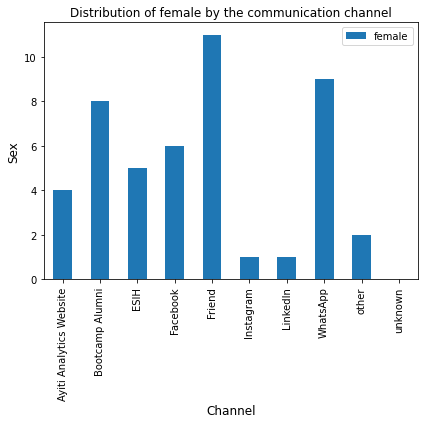

In [302]:
figure_1 = channel_female.iloc[0,:].plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = figure_1.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(6,6)
# Change the axes labels
figure_1.set_xlabel("Channel",fontsize=12)
figure_1.set_ylabel("Sex",fontsize=12)
figure_1.set_title("Distribution of female by the communication channel",fontsize=12)
# to put a font size to the graph
plt.rcParams.update({'font.size': 10})
#add legend
figure_1.legend()
plt.tight_layout()
#plt.show()
figure_1

## Answer

Ayiti Analytics, Bootcamp Alumni, Friend, Facebook, Whatsapp are ythe must effective communication channels that will allow a woman to be susceptible to selection

In [308]:
marketing_female= pd.pivot_table(result5, values="quest_id",index="Sex",columns="what will you do after",aggfunc="count")
marketing_female.T

Sex,female,male
what will you do after,,
Finding a job/internship,10.0,33.0
Improving my data analysis skills,24.0,106.0
Mentorship,4.0,9.0
Switching careers,3.0,17.0
Training to start my own company,6.0,33.0
other,NaN,3.0
unknown,NaN,2.0


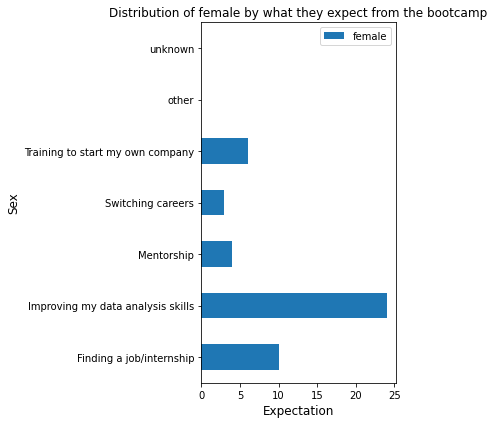

In [316]:
figure_1 = marketing_female.iloc[0,:].plot(kind="barh")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = figure_1.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(6,6)
# Change the axes labels
figure_1.set_xlabel("Expectation",fontsize=12)
figure_1.set_ylabel("Sex",fontsize=12)
figure_1.set_title("Distribution of female by what they expect from the bootcamp",fontsize=12)
# to put a font size to the graph
plt.rcParams.update({'font.size': 10})
#add legend
figure_1.legend()
plt.tight_layout()
#plt.show()
figure_1